## Создаем правильный датасет со станциями метро

In [ ]:
data = pd.read_csv('/content/metro_stations.csv')
data.head(15)

,Station_index,English_name,Line,Russian_name,Depth,Line_Neighbors,Transfers,Opened_Date,Lat,Lon,Station_Type
0,1,Bulvar Rokossovskogo,1,Бульвар Рокоссовского,-8.0,2,266,1990-08-01,55.8147,37.7342,column triple-span
1,2,Cherkizovskaya,1,Черкизовская,-9.0,1 3,267,1990-08-01,55.8039,37.7447,single-vault shallow
2,3,Preobrazhenskaya Ploshchad,1,Преображенская площадь,-8.0,2 4,NaN,1965-12-31,55.7964,37.7150,column triple-span
3,4,Sokolniki,1,Сокольники,-9.0,3 5,221,1935-05-15,55.7889,37.6803,single-vault shallow
4,5,Krasnoselskaya,1,Красносельская,-8.0,4 6,NaN,1935-05-15,55.7799,37.6673,column double-span
5,6,Komsomolskaya,1,Комсомольская,-8.0,5 7,93,1935-05-15,55.7753,37.6561,column triple-span
6,7,Krasnye Vorota,1,Красные Ворота,-31.0,6 8,NaN,1935-05-15,55.7689,37.6486,pylon triple-vault
7,8,Chistye Prudy,1,Чистые пруды,-35.0,7 9,108 205,1935-05-15,55.7658,37.6444,pylon triple-vault
8,9,Lubyanka,1,Лубянка,-32.5,8 10,134,1935-05-15,55.7592,37.6272,pylon triple-vault
9,10,Okhotny Ryad,1,Охотный Ряд,-15.0,9 11,39 65,1935-05-15,55.7577,37.6167,pylon triple-vault


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Station_index   303 non-null    int64  
 1   English_name    303 non-null    object 
 2   Line            303 non-null    int64  
 3   Russian_name    303 non-null    object 
 4   Depth           303 non-null    float64
 5   Line_Neighbors  303 non-null    object 
 6   Transfers       143 non-null    object 
 7   Opened_Date     303 non-null    object 
 8   Lat             303 non-null    float64
 9   Lon             303 non-null    float64
 10  Station_Type    303 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 26.2+ KB


In [ ]:
import pandas as pd

df = pd.read_csv('metro_stations.csv', encoding='utf-8')

stations = df[['Russian_name', 'Lat', 'Lon']].copy()

stations.columns = ['station_name', 'latitude', 'longitude']

stations = stations.drop_duplicates(subset=['station_name'])

stations.to_csv('metro_coordinates.csv', index=False, encoding='utf-8-sig')

print(f"Сохранено {len(stations)} уникальных станций")
print(stations.head())

Сохранено 269 уникальных станций
             station_name  latitude  longitude
0   Бульвар Рокоссовского   55.8147    37.7342
1            Черкизовская   55.8039    37.7447
2  Преображенская площадь   55.7964    37.7150
3              Сокольники   55.7889    37.6803
4          Красносельская   55.7799    37.6673


In [ ]:
from geopy.distance import geodesic

ads_df = pd.read_csv('/content/ads_with_metro_distance.csv')
metro_df = pd.read_csv('metro_coordinates.csv')

## Объединяем исходный датасет со станциями метро по координатам


In [ ]:
import pandas as pd
from geopy.distance import geodesic

ads_df = pd.read_csv('/content/ads_with_metro_distance.csv', encoding='utf-8')
metro_df = pd.read_csv('metro_coordinates.csv')

print("Столбцы в ads_df:", ads_df.columns.tolist())
print("Столбцы в metro_df:", metro_df.columns.tolist())

def safe_get_nearest(row, metro_data):
    try:
        lat, lon = row['lat'], row['lon']
        if pd.isna(lat) or pd.isna(lon):
            return None, None

        metro_data['distance'] = metro_data.apply(
            lambda x: geodesic((lat, lon), (x['latitude'], x['longitude'])).meters,
            axis=1
        )
        nearest = metro_data.loc[metro_data['distance'].idxmin()]
        return nearest['station_name'], nearest['distance']
    except Exception as e:
        print(f"Ошибка для строки {row.name}: {str(e)}")
        return None, None

ads_df[['nearest_metro', 'metro_distance_m']] = ads_df.apply(
    safe_get_nearest,
    args=(metro_df,),
    axis=1,
    result_type='expand'
)

ads_df.to_csv('result.csv', index=False)
print("Готово! Результат сохранён в result.csv")

Столбцы в ads_df: ['district', 'underground', 'street', 'house_number', 'floor', 'floors_count', 'total_meters', 'living_meters', 'kitchen_meters', 'rooms_count', 'year_construction', 'house_material_type', 'heating_type', 'price_per_month', 'commissions', 'author', 'author_type', 'phone', 'url', 'full_address', 'lat', 'lon', 'nearest_metro', 'metro_distance_m']
Столбцы в metro_df: ['station_name', 'latitude', 'longitude']
Готово! Результат сохранён в result.csv


In [ ]:
import re

def normalize_district(name):
    if not isinstance(name, str):
        return ''
    name = name.strip()
    name = name.lower()
    name = name.replace('ё', 'е')
    name = re.sub(r'\s+', ' ', name)
    return name


In [ ]:
import pandas as pd
df = pd.read_csv('/content/result.csv')
df['district_norm'] = df['district'].apply(normalize_district)
df.head(10)

,district,underground,street,house_number,floor,floors_count,total_meters,living_meters,kitchen_meters,rooms_count,...,author,author_type,phone,url,full_address,lat,lon,nearest_metro,metro_distance_m,district_norm
0,Текстильщики,Текстильщики,Люблинская,11С2,4,5,30.0,NaN,NaN,1,...,Циан х ПИК-Аренда,real_estate_agent,NaN,https://www.cian.ru/rent/flat/317624210/,"Москва, Люблинская , 11С2",55.710872,37.732449,Текстильщики ...,236.769637,текстильщики
1,Басманный,Бауманская,Переведеновский переулок,3,2,12,38.8,NaN,NaN,1,...,Юлия Лиховидова,realtor,NaN,https://www.cian.ru/rent/flat/317624208/,"Москва, Переведеновский переулок, 3",55.779522,37.690614,Электрозаводская,856.174522,басманный
2,NaN,Коммунарка,Липовый Парк,10к3,14,17,43.6,NaN,NaN,1,...,ID 264850,unknown,NaN,https://www.cian.ru/rent/flat/317624175/,"Москва, Липовый Парк, 10к3",55.569018,37.485991,Ольховая,1678.173578,
3,Савеловский,Петровский Парк,Мишина,16,8,9,21.0,NaN,NaN,1,...,ID 1877524,homeowner,NaN,https://www.cian.ru/rent/flat/317624171/,"Москва, Мишина, 16",55.794946,37.566178,Петровский парк,668.503649,савеловский
4,NaN,Ольховая,Городская,20,8,19,40.0,NaN,NaN,1,...,Диана Товт,realtor,NaN,https://www.cian.ru/rent/flat/317624168/,"Москва, Городская, 20",55.492716,37.315978,Новомосковская,11870.244559,
5,Даниловский,Тульская,3-й Павелецкий проезд,9,5,5,32.0,NaN,NaN,1,...,Диана Товт,realtor,NaN,https://www.cian.ru/rent/flat/317624065/,"Москва, 3-й Павелецкий проезд, 9",55.710738,37.640550,Тульская,1132.452926,даниловский
6,Гольяново,Щёлковская,Алтайская,33/7,4,14,39.1,NaN,NaN,1,...,Владислав Леонтьев,realtor,NaN,https://www.cian.ru/rent/flat/317623947/,"Москва, Алтайская , 33/7",55.821157,37.833527,Щёлковская,2551.071169,гольяново
7,Западное Дегунино,Грачёвская,Базовская,15к1,4,18,39.0,NaN,NaN,1,...,Диана Товт,realtor,NaN,https://www.cian.ru/rent/flat/317623780/,"Москва, Базовская , 15к1",55.877041,37.505193,Ховрино,1457.268681,западное дегунино
8,Чертаново Южное,Улица Академика Янгеля,Академика Янгеля,2,22,23,42.9,NaN,NaN,1,...,Екатерина Василькина,realtor,NaN,https://www.cian.ru/rent/flat/317623758/,"Москва, Академика Янгеля, 2",55.596922,37.599903,Улица Академика Янгеля,227.307668,чертаново южное
9,Очаково-Матвеевское,Озёрная,Малая Очаковская,4Ак2,30,33,36.0,NaN,NaN,1,...,Диана Товт,realtor,NaN,https://www.cian.ru/rent/flat/317623739/,"Москва, Малая Очаковская, 4Ак2",55.665655,37.438232,Озёрная,899.221277,очаково-матвеевское


In [ ]:
df_prices = pd.read_csv('/content/district_prices_1.csv')

In [ ]:
result = df.merge(df_prices, on="district_norm", how="left")

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   district             917 non-null    object 
 1   underground          988 non-null    object 
 2   street               991 non-null    object 
 3   house_number         999 non-null    object 
 4   floor                1000 non-null   int64  
 5   floors_count         1000 non-null   int64  
 6   total_meters         1000 non-null   float64
 7   living_meters        0 non-null      float64
 8   kitchen_meters       0 non-null      float64
 9   rooms_count          1000 non-null   int64  
 10  year_construction    0 non-null      float64
 11  house_material_type  0 non-null      float64
 12  heating_type         0 non-null      float64
 13  price_per_month      1000 non-null   int64  
 14  commissions          1000 non-null   int64  
 15  author               1000 non-null   ob

In [ ]:
result_cleaned = result.dropna(axis=1, how='all')

In [ ]:
result_cleaned = result_cleaned[result_cleaned['price_per_month'] <= 500000].copy()

In [ ]:
result_cleaned = result_cleaned.dropna(subset=['lat', 'lon', 'nearest_metro', 'metro_distance_m', "district_norm", "average_price", "lat_avg", "lon_avg"])


In [ ]:
cat_columns = ['district', 'underground', 'street', 'house_number', 'full_address']

In [ ]:
result_cleaned[cat_columns] = result_cleaned[cat_columns].fillna('unknown')


In [ ]:
result_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 0 to 999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   district          851 non-null    object 
 1   underground       851 non-null    object 
 2   street            851 non-null    object 
 3   house_number      851 non-null    object 
 4   floor             851 non-null    int64  
 5   floors_count      851 non-null    int64  
 6   total_meters      851 non-null    float64
 7   rooms_count       851 non-null    int64  
 8   price_per_month   851 non-null    int64  
 9   commissions       851 non-null    int64  
 10  author            851 non-null    object 
 11  author_type       851 non-null    object 
 12  url               851 non-null    object 
 13  full_address      851 non-null    object 
 14  lat               851 non-null    float64
 15  lon               851 non-null    float64
 16  nearest_metro     851 non-null    object 
 17  me

In [ ]:
df = result_cleaned.copy()

from numpy import sqrt

df = df.drop(columns=['house_number', 'commissions', 'full_address', 'district', 'author', 'lat_avg', 'lon_avg'])


In [ ]:

df['meters_per_room'] = df['total_meters'] / df['rooms_count']
df['is_large_apartment'] = (df['total_meters'] > 60).astype(int)

result_cleaned = df

In [ ]:
result_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 0 to 999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   underground         851 non-null    object 
 1   street              851 non-null    object 
 2   floor               851 non-null    int64  
 3   floors_count        851 non-null    int64  
 4   total_meters        851 non-null    float64
 5   rooms_count         851 non-null    int64  
 6   price_per_month     851 non-null    int64  
 7   author_type         851 non-null    object 
 8   url                 851 non-null    object 
 9   lat                 851 non-null    float64
 10  lon                 851 non-null    float64
 11  nearest_metro       851 non-null    object 
 12  metro_distance_m    851 non-null    float64
 13  district_norm       851 non-null    object 
 14  average_price       851 non-null    float64
 15  meters_per_room     851 non-null    float64
 16  is_large_apar

## Как зависит цена от площади

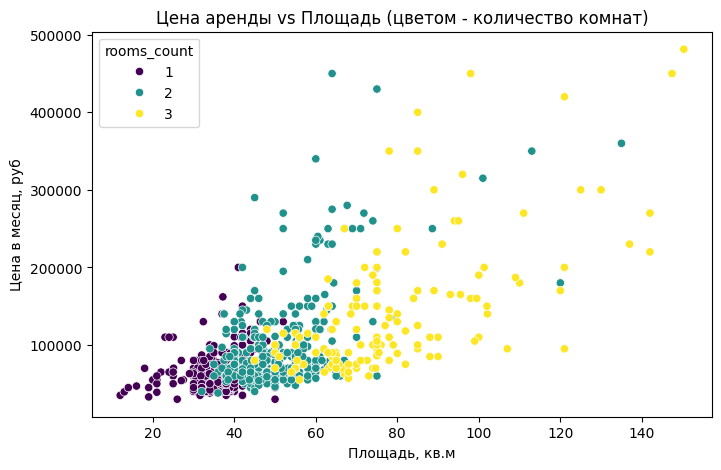

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=result_cleaned, x='total_meters', y='price_per_month', hue='rooms_count', palette='viridis')
plt.title('Цена аренды vs Площадь (цветом - количество комнат)')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Цена в месяц, руб')
plt.show()


## Распределение цены аренды

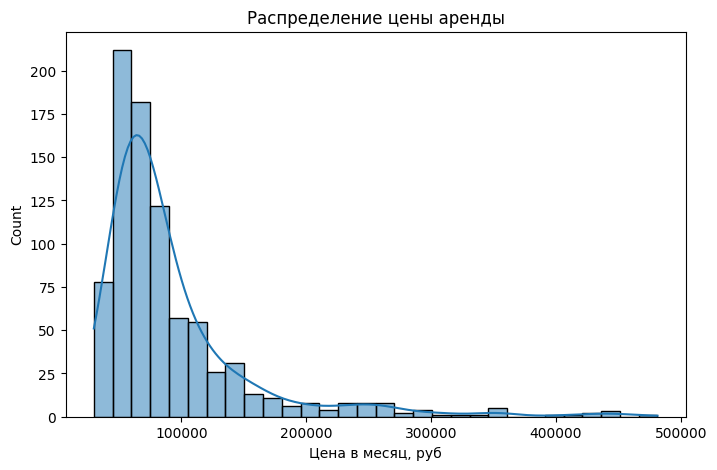

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(result_cleaned['price_per_month'], bins=30, kde=True)
plt.title('Распределение цены аренды')
plt.xlabel('Цена в месяц, руб')
plt.show()


## Подготовка данных для обучения и применения логорифма, чтобы уменьшить влияние выбросов

In [65]:
from sklearn.model_selection import train_test_split
import numpy as np


X = result_cleaned.drop(columns=['price_per_month', 'nearest_metro',
    'district_norm',
    'author_type',
          ])
y = result_cleaned['price_per_month']

y_log = np.log(y)

X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

X_train_final, X_valid, y_train_final_log, y_valid_log = train_test_split(
    X_train, y_train_log, test_size=0.2, random_state=42
)


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 680 entries, 115 to 118
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   underground         680 non-null    object 
 1   street              680 non-null    object 
 2   floor               680 non-null    int64  
 3   floors_count        680 non-null    int64  
 4   total_meters        680 non-null    float64
 5   rooms_count         680 non-null    int64  
 6   url                 680 non-null    object 
 7   lat                 680 non-null    float64
 8   lon                 680 non-null    float64
 9   metro_distance_m    680 non-null    float64
 10  average_price       680 non-null    float64
 11  meters_per_room     680 non-null    float64
 12  is_large_apartment  680 non-null    int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 74.4+ KB


In [52]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 11.2 MB/s eta 0:00:00


## Подбор наилучших гиперпараметров

In [57]:
import optuna
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 300, 1000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-2, 10.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-2, 10.0, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 1),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "verbose": 0,
        "task_type": "CPU",
        "loss_function": "RMSE",
        "eval_metric": "RMSE"
    }

    cat_features = ["street", "underground"]

    train_pool = Pool(X_train_final, y_train_final_log, cat_features=cat_features)
    valid_pool = Pool(X_valid, y_valid_log, cat_features=cat_features)

    model = CatBoostRegressor(**params)

    model.fit(train_pool, eval_set=valid_pool, use_best_model=True)


    y_pred_valid = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid_log, y_pred_valid))
    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Лучшие параметры:")
print(study.best_params)


[I 2025-09-02 12:48:50,268] A new study created in memory with name: no-name-e7108b63-184c-4c70-bff5-c2293038d022
[I 2025-09-02 12:48:54,912] Trial 0 finished with value: 0.23220973572743323 and parameters: {'iterations': 490, 'depth': 10, 'learning_rate': 0.08189079037671987, 'l2_leaf_reg': 4.117994953558921, 'random_strength': 0.011709126258791442, 'bagging_temperature': 0.11970835968130433, 'border_count': 51}. Best is trial 0 with value: 0.23220973572743323.
[I 2025-09-02 12:49:08,582] Trial 1 finished with value: 0.20476615653398084 and parameters: {'iterations': 559, 'depth': 10, 'learning_rate': 0.14413415237711621, 'l2_leaf_reg': 0.20438807311046112, 'random_strength': 1.428911814476584, 'bagging_temperature': 0.07902509949193892, 'border_count': 247}. Best is trial 1 with value: 0.20476615653398084.
[I 2025-09-02 12:49:12,076] Trial 2 finished with value: 0.2136332495919994 and parameters: {'iterations': 537, 'depth': 8, 'learning_rate': 0.05018780346079444, 'l2_leaf_reg': 0.0

Лучшие параметры:
{'iterations': 722, 'depth': 9, 'learning_rate': 0.03668345167905929, 'l2_leaf_reg': 0.5131328948390929, 'random_strength': 3.2532897087759216, 'bagging_temperature': 0.3989740931288765, 'border_count': 193}


In [67]:

from catboost import CatBoostRegressor


best_params = {
    'iterations': 722,
    'depth': 9,
    'learning_rate': 0.03668345167905929,
    'l2_leaf_reg': 0.5131328948390929,
    'random_strength': 3.2532897087759216,
    'bagging_temperature': 0.3989740931288765,
    'border_count': 193
}
cat_features= ['street', 'underground']
final_model = CatBoostRegressor(
    cat_features=cat_features,
    **best_params,
    verbose=100,
    random_state=42
)

final_model.fit(X_train, y_train_log)


CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=6]="https://www.cian.ru/rent/flat/317612736/": Cannot convert 'https://www.cian.ru/rent/flat/317612736/' to float

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_log = final_model.predict(X_test)
y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test_log)

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"MAE на тесте: {mae:.2f}")
print(f"RMSE на тесте: {rmse:.2f}")
print(f"R2 на тесте: {r2:.4f}")


MAE на тесте: 15713.29
RMSE на тесте: 28954.36
R2 на тесте: 0.7497


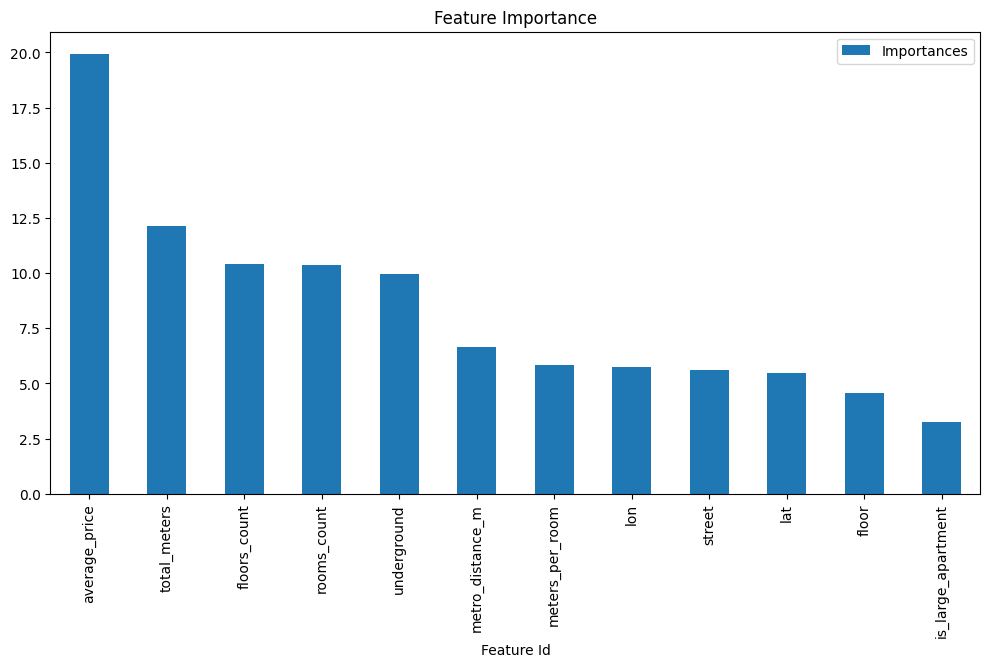

In [60]:
import matplotlib.pyplot as plt

feature_importance = final_model.get_feature_importance(prettified=True)
feature_importance.plot.bar(x='Feature Id', y='Importances', figsize=(12, 6))
plt.title("Feature Importance")
plt.show()


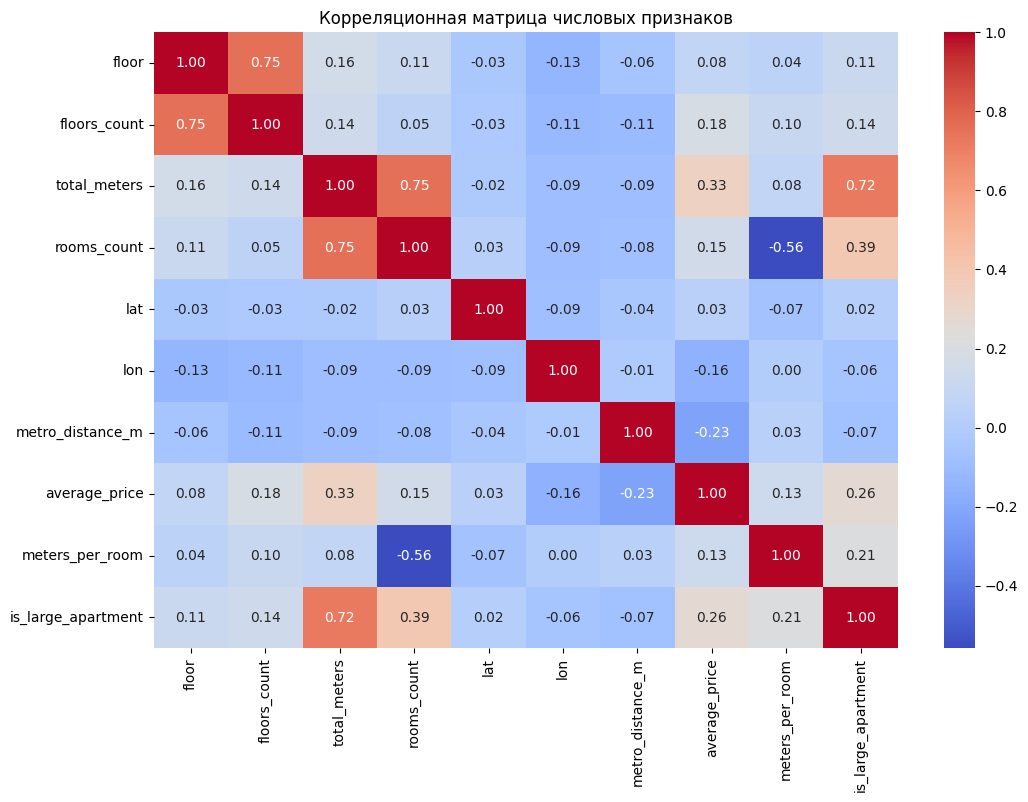

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(X_train[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица числовых признаков")
plt.show()


In [68]:
import pandas as pd

# допустим, это тот датафрейм, который ты реально подавал в модель
X_train.head()

# объединяем признаки и таргет (в логарифме или в оригинале, смотри что удобнее)
df_processed = X_train.copy()
df_processed["price_log"] = np.exp(y_train_log)  # или np.exp(y_train_final_log), если хочешь хранить обычные цены

# сохраняем в CSV
df_processed.to_csv("cian_train_10features.csv", index=False, encoding="utf-8")


## Сохраняем модель для дальнейшего использования

In [61]:
final_model.save_model("catboost_model.cbm")


In [62]:
import joblib
joblib.dump(list(X_train_final.columns), "feature_columns.pkl")


['feature_columns.pkl']